# argo_seasonality

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [2]:
import filt_funcs as ff
import EV_funcs as ef

In [3]:
so_ds=xr.open_dataset("202206/202206_lon:(25,45)_lat:(-60,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
so_param = [25,45,-60,-50]

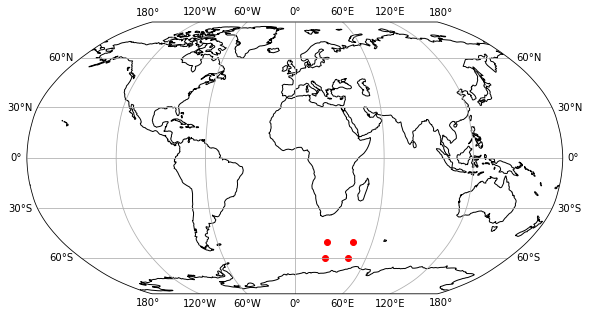

In [4]:
plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.plot(so_param[0],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[0],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')

Text(0.5, 1.0, '# floats total')

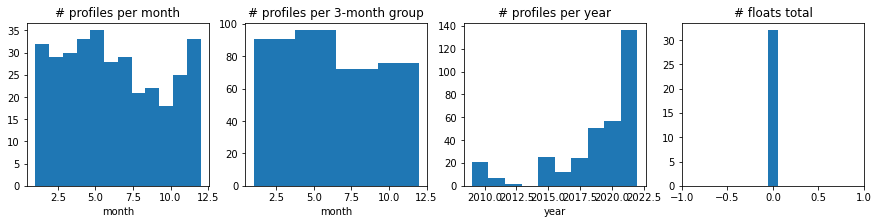

In [5]:
plt.figure(figsize=(15,3))

plt.subplot(1,4,1)
so.TIME.dt.month.plot.hist(bins=12)
plt.title('# profiles per month')

plt.subplot(1,4,2)
so.TIME.dt.month.plot.hist(bins=4)
plt.title('# profiles per 3-month group')

plt.subplot(1,4,3)
so.TIME.dt.year.plot.hist()
plt.title('# profiles per year')

plt.subplot(1,4,4)
plt.bar(0,len(np.unique(so.PLATFORM_NUMBER)),.1)
plt.xlim(-1,1)
plt.title('# floats total')

Want:

- Group 1: months 1,2,3 (Jan,Feb,Mar)
- Group 2: months 4,5,6 (Apr,May,Jun)
- Group 3: months 7,8,9 (Jul,Aug,Sep)
- Group 4: months 10,11,12 (Oct,Nov,Dec)

## CT, SA, SIG0

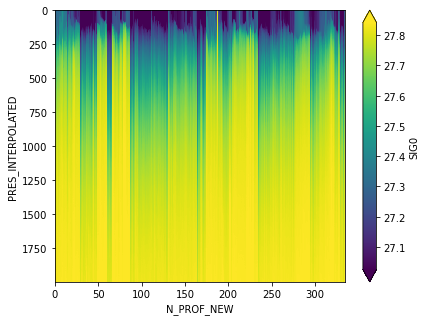

In [64]:
plt.figure(figsize=(6.5,5))

so.SIG0.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',robust=True)
plt.gca().invert_yaxis()

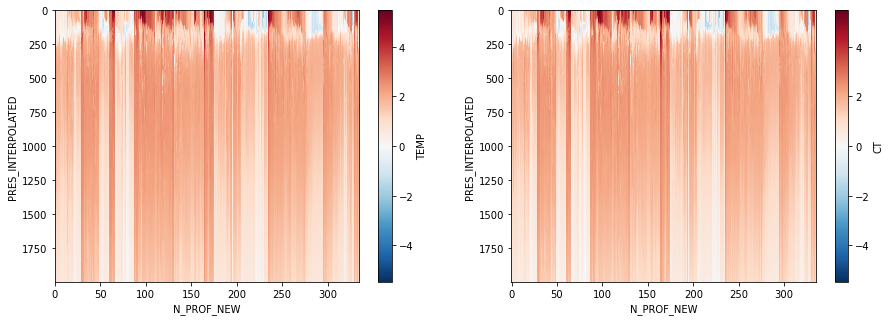

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
so.TEMP.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
so.CT.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()

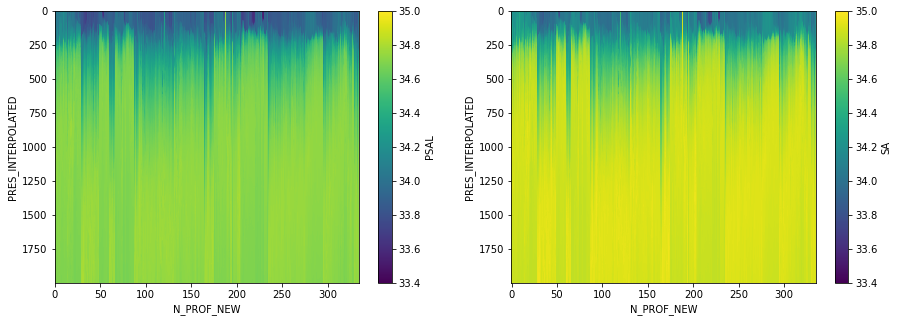

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
so.PSAL.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=33.4,vmax=35)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
so.SA.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=33.4,vmax=35)
plt.gca().invert_yaxis()

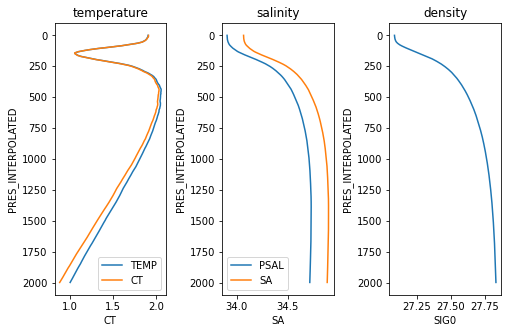

In [65]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
so.TEMP.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='TEMP')
so.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='CT')
plt.gca().invert_yaxis()
plt.legend()
plt.title('temperature')

plt.subplot(1,3,2)
so.PSAL.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='PSAL')
so.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='SA')
plt.gca().invert_yaxis()
plt.legend()
plt.title('salinity')

plt.subplot(1,3,3)
so.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('density')

plt.subplots_adjust(wspace=0.5)

## EV Plots

In [6]:
so1 = so.where(so.TIME.dt.month>0).where(so.TIME.dt.month<4)
so2 = so.where(so.TIME.dt.month>3).where(so.TIME.dt.month<7)
so3 = so.where(so.TIME.dt.month>6).where(so.TIME.dt.month<10)
so4 = so.where(so.TIME.dt.month>9).where(so.TIME.dt.month<13)

In [7]:
so1_CT_EV = ef.get_eddy_variance(so1,100)
so2_CT_EV = ef.get_eddy_variance(so2,100)
so3_CT_EV = ef.get_eddy_variance(so3,100)
so4_CT_EV = ef.get_eddy_variance(so4,100)

In [8]:
so1_SA_EV = ef.get_eddy_variance(so1,100)
so2_SA_EV = ef.get_eddy_variance(so2,100)
so3_SA_EV = ef.get_eddy_variance(so3,100)
so4_SA_EV = ef.get_eddy_variance(so4,100)

In [9]:
so1_SIG0_EV = ef.get_eddy_variance(so1,100,variable='SIG0')
so2_SIG0_EV = ef.get_eddy_variance(so2,100,variable='SIG0')
so3_SIG0_EV = ef.get_eddy_variance(so3,100,variable='SIG0')
so4_SIG0_EV = ef.get_eddy_variance(so4,100,variable='SIG0')

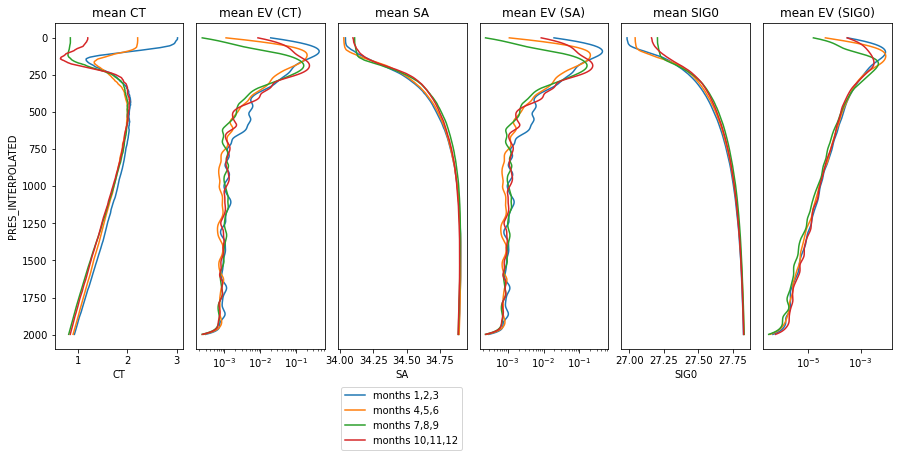

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(1,6,1)
so1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,6,2)
so1_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (CT)')

plt.subplot(1,6,3)
so1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SA')

plt.subplot(1,6,4)
so1_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 1,2,3')
so2_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 4,5,6')
so3_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 7,8,9')
so4_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 10,11,12')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.yticks([])
plt.ylabel('')
plt.legend(bbox_to_anchor=(-.1, -0.1))
plt.title('mean EV (SA)')

plt.subplot(1,6,5)
so1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SIG0')

plt.subplot(1,6,6)
so1_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (SIG0)')

plt.subplots_adjust(wspace=0.1)

## Z Grid --> Rho Grid

In [37]:
so

<xarray.Dataset>
Dimensions:                (N_PROF: 335, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF                 (N_PROF) int64 1967 1968 1969 1970 ... 5848 5850 5913
    TIME                   (N_PROF) datetime64[ns] 2015-07-11T03:25:10 ... 20...
    LATITUDE               (N_PROF) float64 -52.29 -51.84 ... -50.81 -51.94
    LONGITUDE              (N_PROF) float64 25.93 27.78 28.84 ... 30.96 32.08
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998
    N_PROF_NEW             (N_PROF) int64 0 1 2 3 4 5 ... 330 331 332 333 334
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 4 4 4 4 4 4 4 4 ... 5 5 14 10 10 10 13
    CT                     (N_PROF, PRES_INTERPOLATED) float64 0.9924 ... 1.098
    CYCLE_NUMBER           (N_PROF) int32 56 57 58 59 60 ... 169 151 153 155 247
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1901700 1901700 ... 7900203 7900305
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 1.1 ... 1.998e+03
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 34.0 ... 34.73
    SA                     (N_PROF, PRES_INTERPOLATED) float64 34.16 ... 34.9
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 27.24 ... 27.83
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 0.988 ... 1.223
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/04/01
    Fetched_constraints:  [x=25.00/45.00; y=-60.00/-50.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/coriolis/6900750...
    history:              Variables filtered according to DATA_MODE; Variable...

In [49]:
import scipy.interpolate as interpolate

def func_var_int(ds, var, rho_grid, flag='group'):
    
    N_PROF_num = ds['N_PROF'].values
    
    rho = ds.SIG0
    rho_nonan = rho.where(~np.isnan(rho), drop=True)
    
    var_nonan = ds[var].where(~np.isnan(rho), drop=True)
    
    var_nonan2 = var_nonan.where(~np.isnan(var_nonan), drop=True)
    
    if flag == 'group': # incase density is identical b/w two points (this makes things very slow)
        var_nonan = var_nonan.groupby(rho_nonan).mean()
        rho_nonan = rho_nonan.groupby(rho_nonan).mean()
    
    if (len(rho_nonan)>2) & (len(var_nonan2)>2):
        fvar = interpolate.PchipInterpolator(rho_nonan, var_nonan, extrapolate=False)
    
        var_tilde = fvar(rho_grid)
    else:
        var_tilde = np.nan*rho_grid
    
    return xr.DataArray(var_tilde.reshape((-1,1)),
                        dims = ['rho_grid', 'N_PROF'],
                        coords = {'rho_grid': rho_grid, 'N_PROF': [N_PROF_num]}).rename(var)

In [53]:
def interpolate2density(ds_z):
    N_PROF_ind = 0
    pres_tilde_xr = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'PRES_INTERPOLATED',rho_grid)
    CT_tilde_xr   = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'CT',rho_grid)
    SA_tilde_xr   = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'SA', rho_grid)
    SIG0_tilde_xr = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'SIG0', rho_grid)
    lat_tilde_xr  = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'LATITUDE', rho_grid)
    lon_tilde_xr  = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'LONGITUDE', rho_grid)
    days_tilde_xr = func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'TIME', rho_grid)

    for N_PROF_ind in range(1, len(ds_z.N_PROF)):
        if np.mod(N_PROF_ind, 100)==0:
            print(N_PROF_ind)
        pres_tilde_xr = xr.concat([pres_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'PRES_INTERPOLATED', rho_grid)], dim='N_PROF')
        CT_tilde_xr = xr.concat([CT_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'CT', rho_grid)], dim='N_PROF')
        SA_tilde_xr = xr.concat([SA_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'SA', rho_grid)], dim='N_PROF')
        SIG0_tilde_xr = xr.concat([O2_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'SIG0', rho_grid)], dim='N_PROF')
        LAT_tilde_xr = xr.concat([lat_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'LATITUDE', rho_grid)], dim='N_PROF')
        LON_tilde_xr = xr.concat([lon_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'LONGITUDE', rho_grid)], dim='N_PROF')
        TIME_tilde_xr = xr.concat([days_tilde_xr , func_var_int(ds_z.isel(N_PROF=N_PROF_ind), 'TIME', rho_grid)], dim='N_PROF')

    return xr.merge([pres_tilde_xr, CT_tilde_xr,
                             SA_tilde_xr, SIG0_tilde_xr, LAT_tilde_xr,
                             LON_tilde_xr, TIME_tilde_xr])

In [54]:
rho_grid = np.linspace(26.8, 27.8,1001)

In [55]:
so_rho = interpolate2density(so)

ValueError: Dimensions {'PRES_INTERPOLATED'} do not exist. Expected one or more of ()